In [ ]:
#モジュールのインポート
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits_data = datasets.load_digits()
digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64) 
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64) 


print(x_train)
print(t_train)

tensor([[ 0.,  0.,  0.,  ...,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  5.,  0.],
        [ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  5., 16.,  ...,  8.,  6.,  0.],
        [ 0.,  0.,  2.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.]])
tensor([1, 6, 0,  ..., 2, 4, 1])


In [ ]:
from torch import nn

net = nn.Sequential(
  # ------- [改良点1] #Q1S --------
  # ここから「ここまで」のコードを変更すること
  nn.Linear(64, 10000),  # 8x8の画像なので64からスタートするのは固定
  nn.ReLU(),
  nn.Linear(10000, 10)   #0から9の10種の数字に対応するので最後が10も固定
  # ここまで
  # ------- #Q1E -------
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=10000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10000, out_features=10, bias=True)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  if sys.path[0] == '':


Epoch: 0 Loss_Train: 2.6129868030548096 Loss_Test: 2.674907922744751


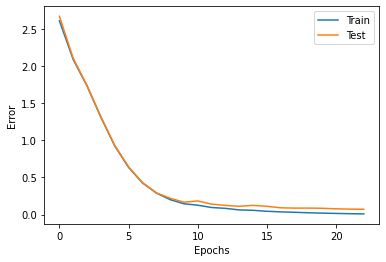

正解率: 97.77777777777777%


In [ ]:
from torch import optim
# 次の部分は、このセルを何度実行しても「追加で学習」ではなく「最初から学習しなおし」になるように
# パラメータをXavierで初期化している
# Xavierの他、Heの初期化などいくつかの有効な初期化手法がある
# 一般に、シグモイド関数であればXavierの初期化がよいとされており、
# ReLUを考慮したのがHeの初期化、nn.init.kaiming_uniform_(m.weight)とする
# いずれもuniformは、normalの分布形状を指定できる
# ここでは、詳細は省略するが収束しやすいように工夫して初期化していると理解すれば十分である
# 詳細はGANにおいて説明する
def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0.01)
net.apply(init_weights)
# ここまでが初期化のためのコードで無視してよい
# 皆さんはこのセルだけ実行すればよい
# つまり、先ほどのコードは初期化されないため繰り返し押すと学習が追加で進むことになる
lossfn = nn.CrossEntropyLoss()

#[変更点2] #Q2
optimizer = optim.Rprop(net.parameters(), lr=0.0001)

record_loss_train = []
record_loss_test = []

for i in range(23): #[変更点3] #Q3
  optimizer.zero_grad()
  y_train = net(x_train)
  y_test = net(x_test)
  loss_train = lossfn(y_train, t_train)
  loss_test = lossfn(y_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())
  loss_train.backward()
  optimizer.step()
  if i%100 == 0:
    print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

import matplotlib.pyplot as plt
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")
